## Lead Scoring Model Development

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import os
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 4000

In [4]:
path = "C:\\Users\\Hannah Nevel\\Documents\\Modeling\\Model Data\\3_12_2024_leads.csv"
lead_data = pd.read_csv(path)
lead_data

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_18732\1572183126.py:2: DtypeWarning: Columns (8,9,16,19,21,24,25,28,29,30,38,39,40,41,42,43,44,45,46,50,51,56,62,63,65,68,69,70,71,72,73,74,75,77,91) have mixed types. Specify dtype option on import or set low_memory=False.
  lead_data = pd.read_csv(path)


,ID,Email,First Name,Last Name,Phone Number,Date Created,IP Address,User Agent,Organization,Account (previously Organization),...,*Webinar_Content,*Last Updated Abandon,*gclid,*fbclid,*Chat Selection,*Email Activity,*Website Scoring,*Guide / Evergreen Lead Score,*Lead Scoring,Tags
0,184247,wilmotwhitney3rd@gmail.com,WIL,NaN,17818014986,3/4/2024 23:29,10.13.140.99,okhttp/3.14.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,"030724,Devin-GTW,attended,calendly,devin-invit..."
1,184246,carrie_osgoodmillsap@yahoo.com,Carrie,Osgood-Millsap,14323603575,3/4/2024 23:16,10.13.135.100,okhttp/3.14.1,NaN,NaN,...,2024/01/12_Webinar_Daily_9-13%_C12012023_5thBa...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"03052024,GTW,didnotattend,roundrobin,webinar"
2,184245,RealZon21@gmail.com,Naszon,Scott,17246830624,3/4/2024 23:06,10.13.128.14,okhttp/3.14.1,NaN,NaN,...,2023/12/07_Webinar_Daily_9-13%_C12012023_1C2_3...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,"03052024,GTW,didnotattend,roundrobin,webinar"
3,184244,amalfiblanco@icloud.com,Amalfi Blanco,Blanco,17864869645,3/4/2024 22:11,10.13.151.4,okhttp/3.14.1,NaN,NaN,...,2024/01/12_Webinar_Daily_9-13%_C12012023_5thBa...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,"03052024,GTW,didnotattend,roundrobin,webinar"
4,184243,champhomes@sbcglobal.net,Paul,Champ,15308282902,3/4/2024 22:08,10.13.136.94,okhttp/3.14.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,"030724,Devin-GTW,attended,devin-invite,webinar"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181511,21,granthanson@hughes.net,Grant,G. Hanson and Sandra A. Hanson,NaN,10/15/2021 10:04,34.233.145.248,NaN,0014P00002Fxyrp,0014P00002Fxyrp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,accredited
181512,20,rbj777999@gmail.com,Russell,Johnson,7018668877,10/15/2021 10:04,127.0.0.1,okhttp/3.14.1,0014P00002RQlpu,0014P00002RQlpu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7,"1099-INT,2022-1099,011022,011924,020924,022422..."
181513,10,donnelly0731@gmail.com,Sylvia,Simle,NaN,10/15/2021 10:04,127.0.0.1,NaN,0014P00002CSibG,0014P00002CSibG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5,"accredited,fctest"
181514,9,osolheim@gmail.com,Oliver,Solheim,NaN,10/15/2021 10:04,127.0.0.1,NaN,0014P00002CSiam,0014P00002CSiam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,accredited


In [5]:
lead_data['Converted'] = lead_data['*Investor Status'] == 40

In [6]:
lead_data.drop(columns =['ID','Account ID','Job Title', 'Email', 'First Name', 'Last Name', 'Phone Number', 'IP Address', 'User Agent', '*Join Link','*Maturity Date',\
    	'*Investment Record Type',	'*Signature Date',	'*Bond Rate',	'*Contact Owner',	'*Investment Disposition','*IRA Custodian','*Investment Owner',\
            '*sha256',	'*sha256_1','*MAID','*Email Activity','*Website Scoring','*Current Capital','*Webinar Reg D Amount','*Portal Password','*Portal Username',\
                '*Google Term Value','*Google Form Amount','*Last Engaged Date','*Preferred Payment Method','*Legal Name','*Subscription Reg Amount','*Referrer','*Fund ID'\
                    ,'*Purchased Units','*Investor ID','*Birth Month','*Birth Year','*Zipcode FC','*Investor Status','Organization', 'Account (previously Organization)','*Accredidation',\
                        '*Webinar Follow-up','*Fund Name','*Capital Contribution','*Ownership Type','*Purchase Type','*Fund Title','*OnDemand Reg Amount','*Address','*Apartment or Suite Number',\
                            '*Subscription Reg City','*Subscription Reg State','*Investor PIN'], inplace = True)
lead_data.rename(columns = {'*Attendance Time':'Webinar Attendance Time (min)'}, inplace = True)
lead_data.drop_duplicates(subset=None, inplace=True)

In [7]:
lead_data.interpolate(method ='linear', limit_direction ='forward', inplace =True)
lead_data.fillna(method='bfill', inplace = True)

In [8]:
# print(lead_data.isnull().sum())
#percent null values by column
print(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2))

Date Created                              0.00
*City                                     0.00
*State                                    0.00
*Investor Source                          0.00
*Are you an accredited investor?          0.00
*How much are you looking to invest?      0.02
*Webinar Attendance                       0.00
*Industry                                 0.00
*Interest Rating                          0.00
*RegDate                                  0.00
Webinar Attendance Time (min)             0.00
*Lead Score                               0.00
*Webinar Poll Amount                      0.01
*Webinar Reg Amount                       0.04
*Zipcode                                  0.15
*Reg D Form Amount                        0.15
*Reg D Term Value                         0.15
*LeadGen Reg Amount                       0.08
*Form Message                             0.20
*UTM_Source                               0.17
*UTM_Medium                               0.17
*UTM_Campaign

In [9]:
from sklearn.model_selection import train_test_split

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
lead_data.dtypes

Date Created                             object
*City                                    object
*State                                   object
*Investor Source                         object
*Are you an accredited investor?         object
*How much are you looking to invest?     object
*Webinar Attendance                      object
*Industry                                object
*Interest Rating                        float64
*RegDate                                 object
Webinar Attendance Time (min)           float64
*Lead Score                             float64
*Webinar Poll Amount                     object
*Webinar Reg Amount                      object
*Zipcode                                 object
*Reg D Form Amount                       object
*Reg D Term Value                        object
*LeadGen Reg Amount                      object
*Form Message                            object
*UTM_Source                              object
*UTM_Medium                             

In [11]:
encoded_lead_data = MultiColumnLabelEncoder(columns = ['*Investor Source','*Are you an accredited investor?', '*Referral URL','*Webinar Attendance',\
    '*Second Home','Tags','*Industry','*UTM_Source','*UTM_Medium','*Financial Goals','*HHI Estimate','*Liquid Resources','*Webinar_Source']).fit_transform(lead_data)

### Explore Data

In [12]:
encoded_lead_data.corr()

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_18732\1552759152.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  encoded_lead_data.corr()


,*Investor Source,*Are you an accredited investor?,*Webinar Attendance,*Industry,*Interest Rating,Webinar Attendance Time (min),*Lead Score,*UTM_Source,*UTM_Medium,*Financial Goals,...,*Age,*Second Home,*HHI Estimate,*Liquid Resources,*Webinar_Source,*Chat Selection,*Guide / Evergreen Lead Score,*Lead Scoring,Tags,Converted
*Investor Source,1.000000,0.010960,0.004599,-0.099165,0.008593,0.030577,0.020275,-0.019403,-0.026922,-0.037007,...,0.016159,0.004455,-0.002968,-0.006845,0.002625,NaN,-0.008643,-0.006094,0.020986,0.044249
*Are you an accredited investor?,0.010960,1.000000,-0.046887,-0.022020,-0.048192,-0.060413,-0.085487,-0.053331,-0.013198,0.032369,...,-0.001302,0.008486,-0.002268,0.023325,-0.010062,NaN,0.056528,-0.020933,-0.056581,-0.013330
*Webinar Attendance,0.004599,-0.046887,1.000000,-0.000277,0.767303,0.679176,0.234073,0.001074,0.019507,0.004034,...,0.015397,-0.023378,-0.001145,-0.025413,-0.019785,NaN,0.032991,0.303265,0.028843,0.097413
*Industry,-0.099165,-0.022020,-0.000277,1.000000,-0.001106,-0.010758,0.004657,0.058159,0.088026,0.072794,...,-0.007654,-0.005077,-0.008141,-0.000541,0.001835,NaN,0.010386,-0.003032,0.009917,-0.009575
*Interest Rating,0.008593,-0.048192,0.767303,-0.001106,1.000000,0.757997,0.304636,0.000971,0.011381,-0.002604,...,0.017156,-0.021892,0.000733,-0.023992,-0.018027,NaN,0.032631,0.321777,0.031839,0.101987
Webinar Attendance Time (min),0.030577,-0.060413,0.679176,-0.010758,0.757997,1.000000,0.256808,-0.003682,0.013837,-0.011961,...,0.024371,-0.022777,0.000595,-0.031460,-0.023052,NaN,0.027379,0.314366,0.026309,0.126036
*Lead Score,0.020275,-0.085487,0.234073,0.004657,0.304636,0.256808,1.000000,-0.008476,0.005456,-0.046362,...,0.014648,-0.011658,0.006641,-0.020431,-0.010151,NaN,-0.015416,0.101453,-0.018996,0.031175
*UTM_Source,-0.019403,-0.053331,0.001074,0.058159,0.000971,-0.003682,-0.008476,1.000000,0.552396,0.114057,...,-0.023043,-0.001273,-0.007713,0.002799,0.031019,NaN,0.014588,-0.029752,0.004634,-0.008305
*UTM_Medium,-0.026922,-0.013198,0.019507,0.088026,0.011381,0.013837,0.005456,0.552396,1.000000,0.118905,...,-0.015679,-0.009913,-0.005103,-0.002360,0.001772,NaN,0.009932,-0.012265,-0.008273,-0.008000
*Financial Goals,-0.037007,0.032369,0.004034,0.072794,-0.002604,-0.011961,-0.046362,0.114057,0.118905,1.000000,...,-0.021507,0.010922,-0.001753,0.029289,0.026616,NaN,0.103223,-0.018349,0.024820,-0.016744


In [13]:
lead_data['Webinar Attendance Time (min)'].mode()

0    0.0
Name: Webinar Attendance Time (min), dtype: float64

<Axes: xlabel='Webinar Attendance Time (min)', ylabel='*Webinar_Source'>

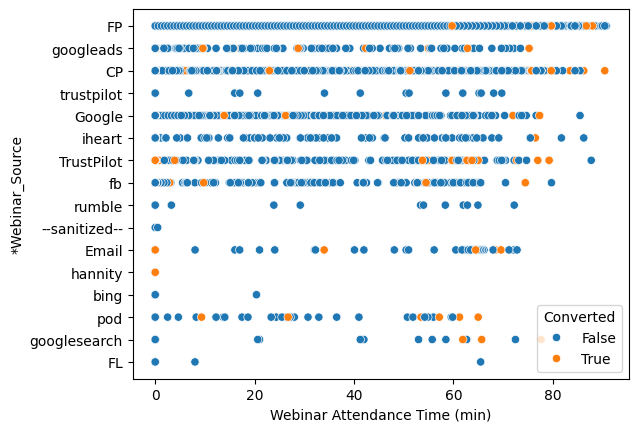

In [14]:
sns.scatterplot(data=lead_data, y='*Webinar_Source',x='Webinar Attendance Time (min)',hue='Converted')

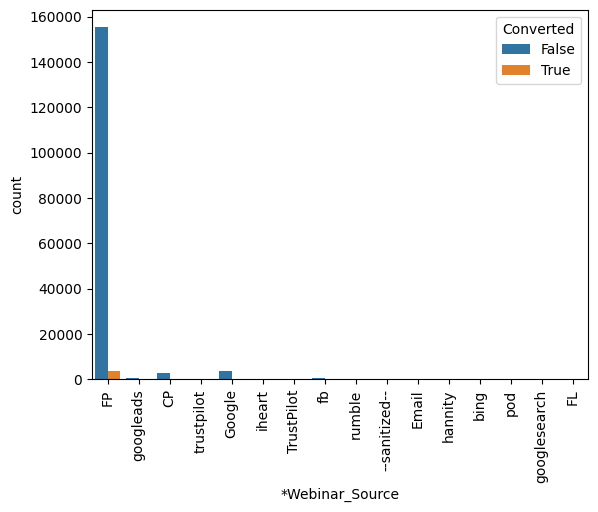

In [15]:
sns.countplot(x = "*Webinar_Source", hue = "Converted", data = lead_data)

plt.xticks(rotation = 90)
plt.show()

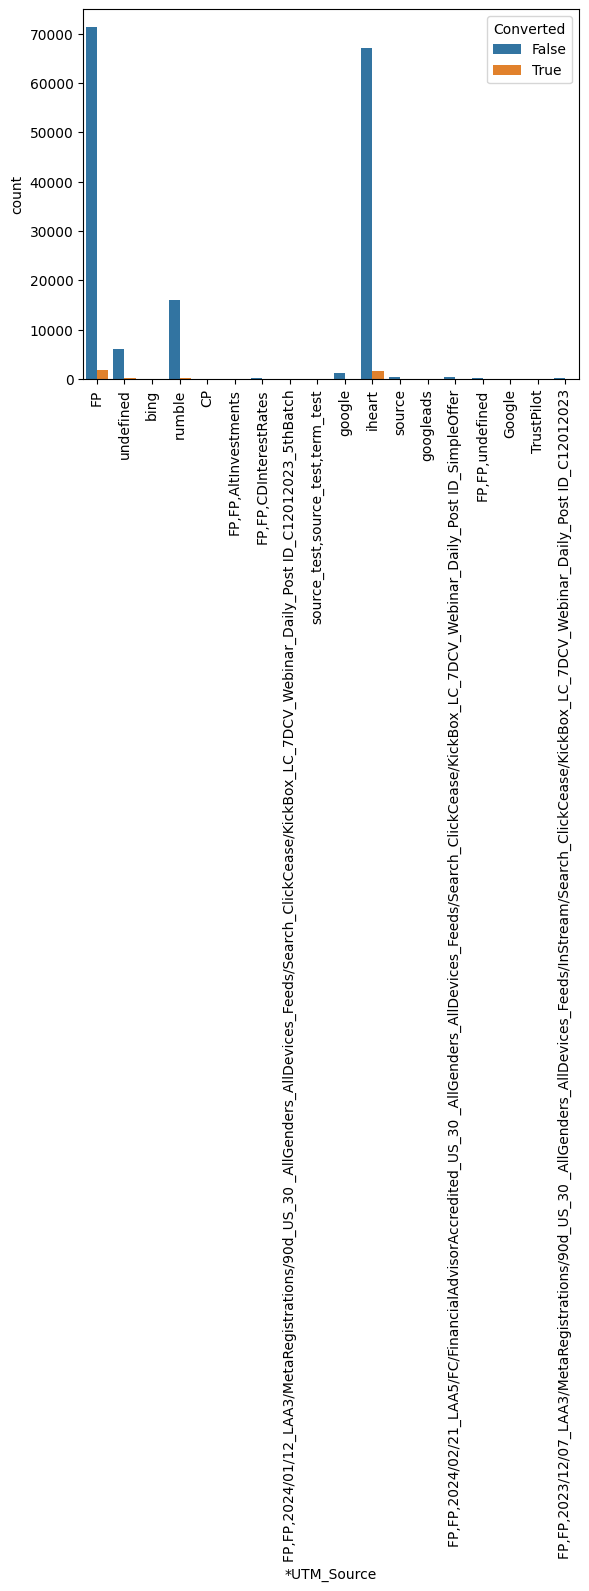

In [16]:
sns.countplot(x = "*UTM_Source", hue = "Converted", data = lead_data)

plt.xticks(rotation = 90)
plt.show()

In [17]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [18]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Converted', 'Converted']); ax.yaxis.set_ticklabels(['Not Converted', 'Converted']) 
    plt.show() 

In [19]:
lead_data['Converted'] = lead_data['Converted'].astype(int)
Y = lead_data['Converted'].to_numpy()
Y

array([0, 0, 0, ..., 0, 1, 0])

In [20]:
X = encoded_lead_data[['*Investor Source','*Are you an accredited investor?', '*Referral URL','*Webinar Attendance',\
    '*Second Home','Tags','*Industry','*UTM_Source','*UTM_Medium','*Financial Goals','*HHI Estimate','*Liquid Resources','*Webinar_Source']]
Xcols = X.columns

In [21]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.15, random_state=2)

In [23]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10).fit(X_train, Y_train)

In [24]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9764558888944682


In [25]:
logreg_cv.score(X_test, Y_test)

0.9748210023866348

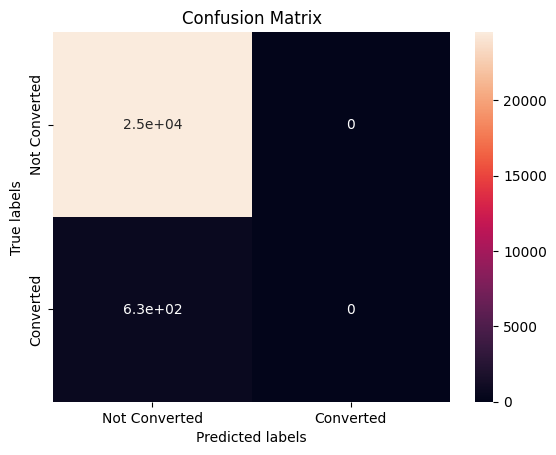

In [26]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [29]:
tree_cv = GridSearchCV(tree, parameters, cv =10).fit(X_train, Y_train)

In [30]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9851392758847481


In [31]:
tree_cv.score(X_test, Y_test)

0.9799522673031026

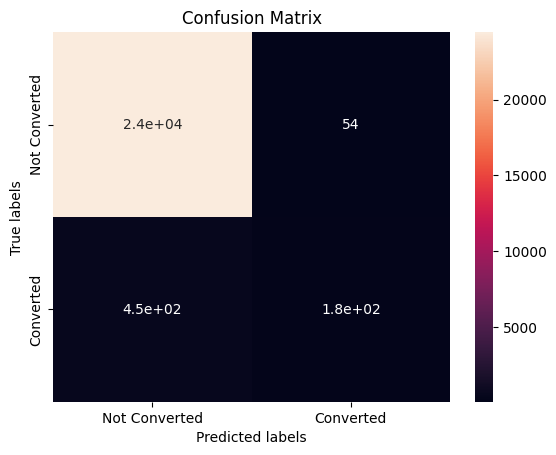

In [32]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
y_pred = rf.predict(X_test)

In [35]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9857199681782021


In [36]:
param_dist = {'n_estimators': randint(50,1000),
              'max_depth': randint(1,40)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000179504331D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017956523710>})

In [37]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 38, 'n_estimators': 495}


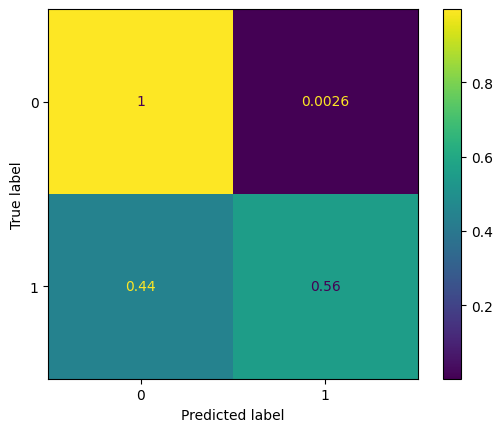

In [38]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

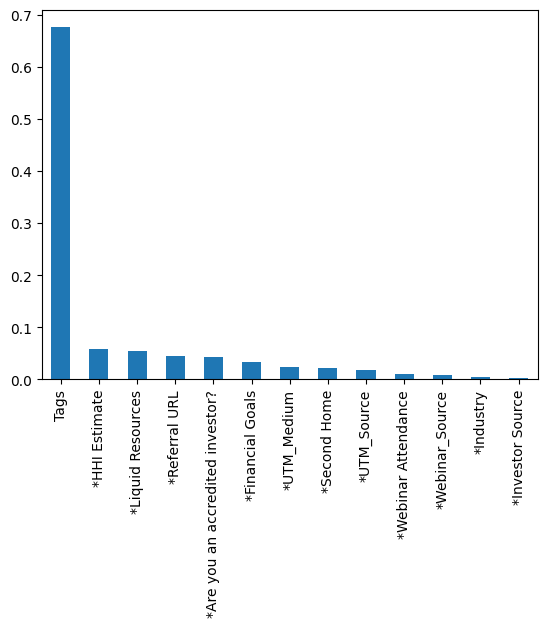

In [39]:
feature_importances = pd.Series(best_rf.feature_importances_, index=Xcols).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [40]:
# Create a random forest classifier
rf2= RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'], max_depth= rand_search.best_params_['max_depth'])


rf2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=38, n_estimators=495)

In [41]:
y_pred2 = rf2.predict(X_test)

In [42]:
accuracy = accuracy_score(Y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9863166268894192


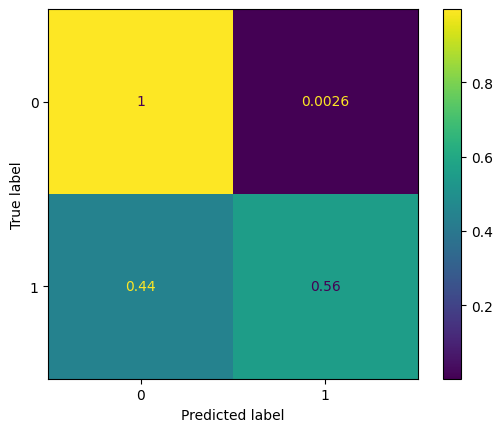

In [43]:
cm2 = confusion_matrix(Y_test, y_pred2)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

ConfusionMatrixDisplay(confusion_matrix=cm2).plot();

In [44]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24507
           1       0.85      0.56      0.67       633

    accuracy                           0.99     25140
   macro avg       0.92      0.78      0.83     25140
weighted avg       0.99      0.99      0.98     25140



In [45]:
filename = 'random_forest_classifier_1.sav'
pickle.dump(rf2, open(filename, 'wb'))

In [46]:
path = "C:\\Users\\Hannah Nevel\\Documents\\Modeling\\Model Data\\3.5.2024 to 3.12.2024 non invested leads.csv"
test_data = pd.read_csv(path, encoding='ISO-8859-1')

test_data.drop(columns =['ID','Account ID','Job Title', 'Phone Number', 'IP Address', 'User Agent', '*Join Link','*Maturity Date',\
    	'*Investment Record Type',	'*Signature Date',	'*Bond Rate',	'*Contact Owner',	'*Investment Disposition','*IRA Custodian','*Investment Owner',\
            '*sha256',	'*sha256_1','*MAID','*Email Activity','*Website Scoring','*Current Capital','*Webinar Reg D Amount','*Portal Password','*Portal Username',\
                '*Google Term Value','*Google Form Amount','*Last Engaged Date','*Preferred Payment Method','*Legal Name','*Subscription Reg Amount','*Referrer','*Fund ID'\
                    ,'*Purchased Units','*Investor ID','*Birth Month','*Birth Year','*Zipcode FC','*Investor Status','Organization', 'Account (previously Organization)','*Accredidation',\
                        '*Webinar Follow-up','*Fund Name','*Capital Contribution','*Ownership Type','*Purchase Type','*Fund Title','*OnDemand Reg Amount','*Address','*Apartment or Suite Number',\
                            '*Subscription Reg City','*Subscription Reg State','*Investor PIN'], inplace = True)
test_data.rename(columns = {'*Attendance Time':'Webinar Attendance Time (min)'}, inplace = True)
test_data.drop_duplicates(subset=None, inplace=True)

In [47]:
encoded_test_data = MultiColumnLabelEncoder(columns = ['*Investor Source','*Are you an accredited investor?', '*Referral URL','*Webinar Attendance',\
    '*Second Home','Tags','*Industry','*UTM_Source','*UTM_Medium','*Financial Goals','*HHI Estimate','*Liquid Resources','*Webinar_Source']).fit_transform(test_data)

X2 = encoded_test_data[['*Investor Source','*Are you an accredited investor?', '*Referral URL','*Webinar Attendance',\
    '*Second Home','Tags','*Industry','*UTM_Source','*UTM_Medium','*Financial Goals','*HHI Estimate','*Liquid Resources','*Webinar_Source']]
Xcols = X2.columns

In [48]:
transform = preprocessing.StandardScaler()
X2 = transform.fit_transform(X2)

In [49]:
y_pred_test_set = rf2.predict(X2)

In [50]:
print(y_pred_test_set)

[0 0 0 ... 0 0 0]


In [51]:
test_data_predictions = test_data.copy()
test_data_predictions['Y'] = y_pred_test_set

In [52]:
test_data_predictions.to_csv("C:\\Users\\Hannah Nevel\\Documents\\Modeling\\Model Data\\3.5.2024 to 3.12.2024 non invested leads_predicted.csv", index = False)